In [1]:
%matplotlib inline
import numpy as np
import scipy as sp
import pandas as pd
from scipy import interpolate
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/JPM/Documents/PhD/Models/Working-GCL/')

import WindTurbine as wt
import WindFarm as wf

sys.path.append('/Users/JPM/OpenMDAO/FUSED-Wake/FortranWake/build/lib.macosx-10.10-intel-2.7/FortranWake/')
import NOJ

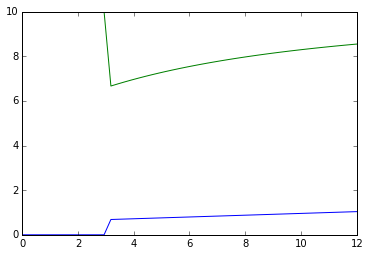

In [2]:
x = np.linspace(0.,12.)
y = np.zeros_like(x)
z = np.zeros_like(x)
DT = 1.*np.ones_like(x)
D = 1.
CT = 0.861
kj = 0.04

RW = NOJ.get_rw(x,D,CT,kj)
dUeq = NOJ.get_dueq(x,y,z,DT,D,CT,kj)

WS = 10.
U = WS + WS*dUeq

#print U
plt.plot(x/D,RW)
plt.plot(x/D,U)

x_g : input rank-2 array('d') with bounds (n,n)

y_g : input rank-2 array('d') with bounds (n,n)

z_g : input rank-2 array('d') with bounds (n,n)

dt : input rank-1 array('d') with bounds (n)

p_c : input rank-3 array('d') with bounds (n,np,2)

ct_c : input rank-3 array('d') with bounds (n,nct,2)

ws : input float

wd : input float
    

In [3]:
# Fused wrapped Fortran wake models
from FortranWake.fused_fortran import FNOJ, FGCL, AEP_f, get_T2T_gl_coord
from FortranWake.fusedwasp import PlantFromWWH, WTDescFromWTG

# FusedWind
from fusedwind.plant_flow.vt import GenericWindFarmTurbineLayout, WTPC, WeibullWindRoseVT, GenericWindRoseVT

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [4]:
wt_layout = PlantFromWWH('hornsrev1_turbine_nodescription.wwh').wt_layout
P_rated = np.sum(wt_layout.wt_array('power_rating'))

1


In [5]:
for wt in wt_layout.wt_list:
    wt.air_density = 1.225
    wt.cut_in_wind_speed = 3.
    wt.cut_out_wind_speed = 25.
    wt.c_t_idle = 0.053
    wt.power_rating = 3600.  
    if  wt.name[-2]=='t':
        wt.name = 'wt0'+wt.name[-1]

In [6]:
x_g,y_g,z_g=get_T2T_gl_coord(wt_layout)
# Run the wind flow case
dt = wt_layout.wt_array(attr='rotor_diameter')
p_c = wt_layout.wt_array(attr='power_curve')
ct_c = wt_layout.wt_array(attr='c_t_curve')
ws = 10.
wd = 270.
kj = 0.05
rho = np.mean(wt_layout.wt_array(attr='air_density'))
ws_ci = wt_layout.wt_array(attr='cut_in_wind_speed')
ws_co = wt_layout.wt_array(attr='cut_out_wind_speed'),
ct_idle = wt_layout.wt_array(attr='c_t_idle')

In [7]:

NOJ.noj_s(x_g,y_g,z_g,dt,p_c,ct_c,ws,wd,kj,rho,ws_ci,ws_co,ct_idle)

(array([  507060.82839362,   555326.02727073,   583641.37382167,
          583830.94836446,   497978.75037802,   534664.83431828,
          534664.83431828,   535259.51799703,   534742.20473325,
          555138.204082  ,   535293.81867477,   535293.81867477,
          534893.55000989,   507146.74194007,   555138.204082  ,
          507155.94508723,   507751.15317542,   507081.41562327,
          507282.5151477 ,   697328.1723954 ,   697328.1723954 ,
          697466.5171388 ,   697466.5171388 ,   697328.1723954 ,
          697328.1723954 ,   697328.1723954 ,   583830.94836446,
          583830.94836446,   584228.08015724,   584228.08015724,
          697466.5171388 ,   583641.37382167,   583641.37382167,
         1341000.        ,   507060.82839362,  1341000.        ,
         1341000.        ,  1341000.        ,  1341000.        ,
         1341000.        ,  1341000.        ,  1341000.        ,
          519890.04117391,   497911.24866514,   519410.79538966,
          519410.79538966